# Use Opencv to apply CLAHE, it preserves the flot64 format. 
# Skimage doesn't

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skimage
from skimage import exposure,img_as_float, data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
#img_dir='/data/meron/kenya_data/meron_photos_processed/'
pic_dir='/data/meron/kenya_data/temp/'
flip_dir='/data/meron/kenya_data/photo_flip/'



In [71]:
#don't delete
def clahe_augment(names, img_dir, output_dir):
    for i,name in enumerate(names):
        file_name=os.path.join(img_dir+name)
        base_name=name.split('.')
        img_bgr=cv2.imread(file_name)
        lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=1.2)
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab = cv2.merge(lab_planes)
        img_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
        output_name=output_dir+base_name[0]+'_clahe.jpg'
        #print(output_name)
        cv2.imwrite(output_name,cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

In [72]:
clahe_augment(file_names, img_dir, clahe_dir)

In [5]:
img=data.imread('/data/meron/kenya_data/temp/1516632562018.jpg')
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.01)

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [65]:
img_bgr = cv2.imread('/data/meron/kenya_data/temp/1516632562018.jpg')

lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=1.2)
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
img_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


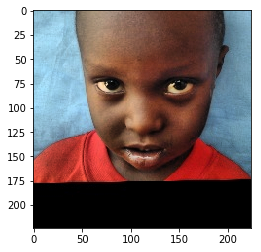

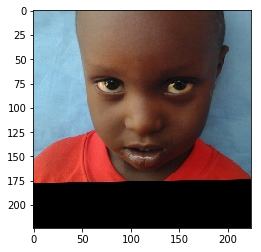

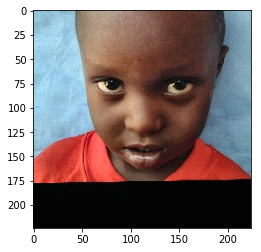

In [82]:
f = plt.figure(1)
plt.imshow(img_adapteq)
f.show()

g = plt.figure(2)
plt.imshow(img)
g.show()

k=plt.figure(3)
plt.imshow(img_rgb)
k.show()

# Horizontal flip

In [96]:
def flip_augment(img_dir, output_dir):
    file_names=os.listdir(img_dir)
    for i,name in enumerate(file_names):
        file_name=os.path.join(img_dir+name)
        #base_name=name.split('.')[0].split('_')[0] #take out the _clahe suffix
        base_name=name.split('.')[0]
        img_bgr=cv2.imread(file_name)
        horizontal_img = cv2.flip(img_bgr, 1)
        flip_rgb=cv2.cvtColor(horizontal_img, cv2.COLOR_BGR2RGB)
        output_name=output_dir+base_name+'_flip.jpg'
        cv2.imwrite(output_name,cv2.cvtColor(flip_rgb, cv2.COLOR_RGB2BGR))

In [97]:

flip_augment(clahe_dir, flip_dir)

# Rotation ??

In [6]:
img = cv2.cvtColor(cv2.imread('/data/meron/kenya_data/temp/1516632562018.jpg'), cv2.COLOR_BGR2RGB)

M1 = cv2.getRotationMatrix2D((img_row/2,img_col/2),90,1)
img_rotate= cv2.warpAffine(img_fullsize,M1,(img_row,img_col))
img_dataset.append(img_rotate)

NameError: name 'img_row' is not defined